**LOGISTIC REGRESSION**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('data.csv')
print(df)

       crop  moisture  temp  pump
0    cotton       638    16     1
1    cotton       522    18     1
2    cotton       741    22     1
3    cotton       798    32     1
4    cotton       690    28     1
..      ...       ...   ...   ...
195  cotton       941    13     1
196  cotton       902    45     1
197  cotton       894    42     1
198  cotton      1022    45     1
199  cotton       979    10     1

[200 rows x 4 columns]


In [2]:
#Names of the columns in the given dataset
print(df.columns)
#Shape of the data frame
print(df.shape)

Index(['crop', 'moisture', 'temp', 'pump'], dtype='object')
(200, 4)


In [3]:
#extracting independent variables
x=df.iloc[:,[1,2]]
print("independent variables")
print(x)
#extracting dependent variables
y=df.iloc[:,3]
print("dependent variables")
print(y)

independent variables
     moisture  temp
0         638    16
1         522    18
2         741    22
3         798    32
4         690    28
..        ...   ...
195       941    13
196       902    45
197       894    42
198      1022    45
199       979    10

[200 rows x 2 columns]
dependent variables
0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: pump, Length: 200, dtype: int64


In [4]:
#checking whether the df has null values
df.isnull().sum()

crop        0
moisture    0
temp        0
pump        0
dtype: int64

In [5]:
#Finding the mean of the each column having NaN
mean_moisture=df['moisture'].mean()
mean_temp=df['temp'].mean()
#replacing na values with mean of moisture and temp columns respectively
df['moisture'].fillna(value=mean_moisture, inplace=True)
df['temp'].fillna(value=mean_temp, inplace=True)
print("updated dataframe:")
print(df[['moisture','temp','pump']])

updated dataframe:
     moisture  temp  pump
0         638    16     1
1         522    18     1
2         741    22     1
3         798    32     1
4         690    28     1
..        ...   ...   ...
195       941    13     1
196       902    45     1
197       894    42     1
198      1022    45     1
199       979    10     1

[200 rows x 3 columns]


In [6]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.8, random_state=0)

In [7]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [8]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [9]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
print(y_pred)

[1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1]


In [10]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 35   6]
 [  0 119]]


In [11]:
#predicting the values of accuracy, precision, recall,f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ascore=accuracy_score(y_test,y_pred)
print("accuracy of logistic regression:",ascore)
pscore=precision_score(y_test,y_pred)
print("precission of logistic regression:",pscore)
rscore=recall_score(y_test,y_pred)
print("recall score of logistic regresion:",rscore)
fsco=f1_score(y_test,y_pred)
print("f1 score of logistic regression:",fsco)

accuracy of logistic regression: 0.9625
precission of logistic regression: 0.952
recall score of logistic regresion: 1.0
f1 score of logistic regression: 0.9754098360655737


Visualizing training set result using logistic regression

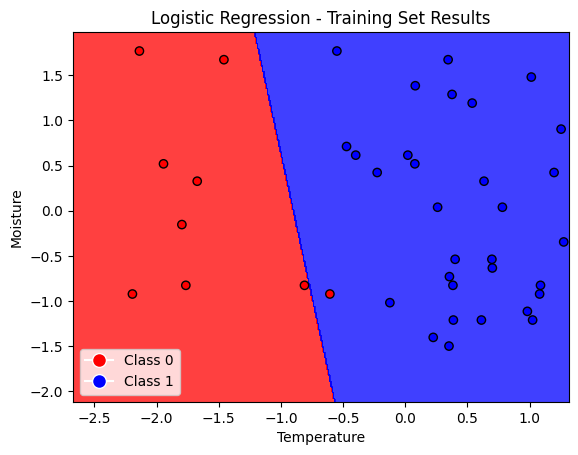

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Assuming X_train has two features 'Temperature' and 'Moisture'
x_train_subset = x_train[:,[0,1]]

# Create a meshgrid for visualization
x_min, x_max = x_train_subset[0].min() - 1, x_train_subset[0].max() + 1
y_min, y_max = x_train_subset[1].min() - 1, x_train_subset[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define custom colormap for classes
cmap_background = ListedColormap(['#FF0000', '#0000FF'])  # Background color for decision regions
cmap_points = ListedColormap(['#FF0000', '#0000FF'])  # Color for training points

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=cmap_background)

# Plot the training points
plt.scatter(x_train_subset[:,0], x_train_subset[:,1], c=y_train, cmap=cmap_points, edgecolors='k', marker='o')

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.title('Logistic Regression - Training Set Results')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Class {}'.format(i),
                      markerfacecolor=c, markersize=10) for i, c in enumerate(cmap_points.colors)]
plt.legend(handles=handles)

# Show the plot
plt.show()


Visualizing testing set result using logistic regression

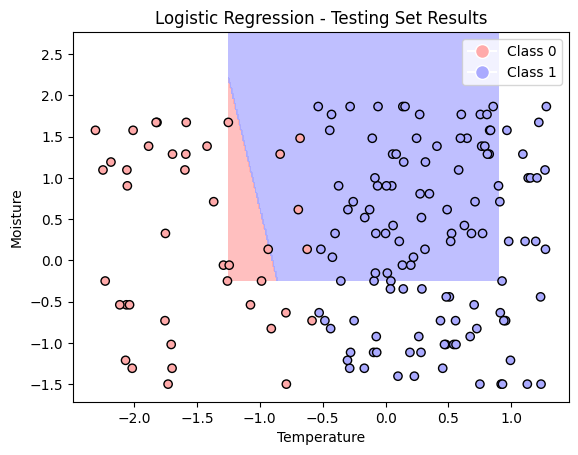

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Create a custom colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Assuming X_test has two features 'Temperature' and 'Moisture'
x_test_subset = x_test[:,[0,1]]

# Create a meshgrid for visualization
x_min, x_max = x_test_subset[0].min() - 1, x_test_subset[0].max() + 1
y_min, y_max = x_test_subset[1].min() - 1, x_test_subset[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using the custom colormap
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.75)

# Plot the testing points
plt.scatter(x_test_subset[:,0], x_test_subset[:,1], c=y_test, cmap=cmap_light, edgecolors='k', marker='o')

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Moisture')
plt.title('Logistic Regression - Testing Set Results')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Class {}'.format(i),
                      markerfacecolor=c, markersize=10) for i, c in enumerate(cmap_light.colors)]
plt.legend(handles=handles)

# Show the plot
plt.show()
